# Ensemble Learning
###  A group of predictors is called an ensemble; thus, this technique is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method

 As an example of an Ensemble method, you can train a group of Decision Tree classi
fiers, each on a different random subset of the training set. To make predictions, you
 obtain the predictions of all the individual trees, then predict the class that gets the
 most votes (see the last exercise in Chapter 6). Such an ensemble of Decision Trees is
 called a Random Forest, and despite its simplicity, this is one of the most powerful
 Machine Learning algorithms available today

# 1. Voting Classifier
 Suppose you have trained a few classifiers, each one achieving about 80% accuracy.
 You may have a Logistic Regression classifier, an SVM classifier, a Random Forest
 classifier, a K-Nearest Neighbors classifier, and perhaps a few more

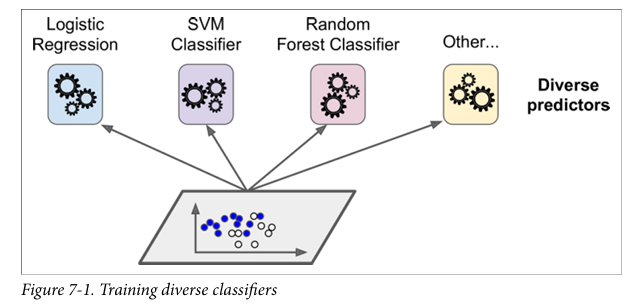

 A very simple way to create an even better classifier is to aggregate the predictions of
 each classifier and predict the class that gets the most votes. This majority-vote classi
fier is called a hard voting classifier

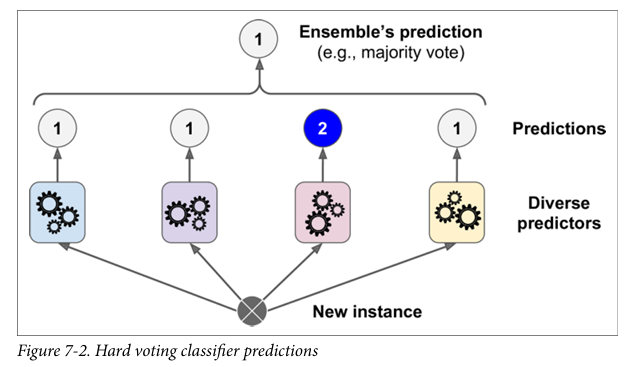

 Somewhat surprisingly, this voting classifier often achieves a higher accuracy than the
 best classifier in the ensemble. In fact, even if each classifier is a weak learner (mean
ing it does only slightly better than random guessing), the ensemble can still be a
 strong learner (achieving high accuracy), provided there are a sufficient number of
 weak learners and they are sufficiently diverse

How is this possible? The following analogy can help shed some light on this mystery.
 Suppose you have a slightly biased coin that has a 51% chance of coming up heads
 and 49% chance of coming up tails. If you toss it 1,000 times, you will generally get
 more or less 510 heads and 490 tails, and hence a majority of heads. If you do the
 math, you will find that the probability of obtaining a majority of heads after 1,000
 tosses is close to 75%. The more you toss the coin, the higher the probability (e.g.,
 with 10,000 tosses, the probability climbs over 97%). This is due to the law of large
 numbers: as you keep tossing the coin, the ratio of heads gets closer and closer to the
 probability of heads (51%). Figure 7-3 shows 10 series of biased coin tosses. You can
 see that as the number of tosses increases, the ratio of heads approaches 51%. Eventu
ally all 10 series end up so close to 51% that they are consistently above 50%

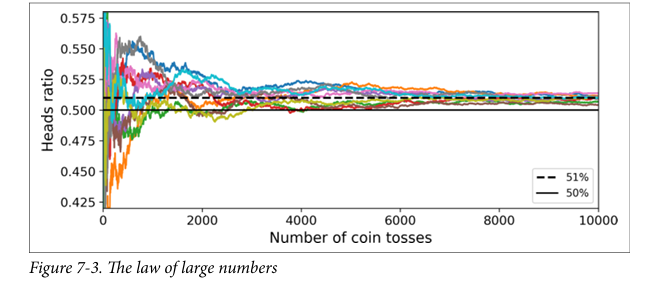

 Similarly, suppose you build an ensemble containing 1,000 classifiers that are individ
ually correct only 51% of the time (barely better than random guessing). If you pre
dict the majority voted class, you can hope for up to 75% accuracy! However, this is
 only true if all classifiers are perfectly independent, making uncorrelated errors,
 which is clearly not the case because they are trained on the same data. They are likely
 to make the same types of errors, so there will be many majority votes for the wrong
 class, reducing the ensemble’s accuracy

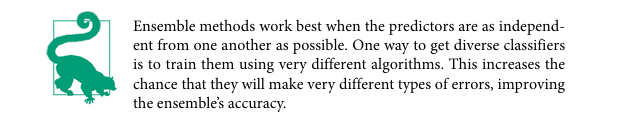

In [1]:
# lets code and check it 
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

x,y=load_iris(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

log_reg=LogisticRegression()
svc=SVC()
rand_tree=RandomForestClassifier()

vote_clf=VotingClassifier(
            estimators=[('lr',log_reg),('svc',svc),('rf',rand_tree)],
            voting='hard'
)
vote_clf.fit(x_train,y_train)

for clf in (log_reg,svc,rand_tree,vote_clf):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_pred,y_test))

LogisticRegression 1.0
SVC 1.0
RandomForestClassifier 1.0
VotingClassifier 1.0


 If all classifiers are able to estimate class probabilities (i.e., they all have a pre
 dict_proba() method), then you can tell Scikit-Learn to predict the class with the
 highest class probability, averaged over all the individual classifiers. This is called soft
 voting. It often achieves higher performance than hard voting because it gives more
 weight to highly confident votes. All you need to do is replace voting="hard" with
 voting="soft" and ensure that all classifiers can estimate class probabilities. This is
 not the case for the SVC class by default, so you need to set its probability hyper
parameter to True (this will make the SVC class use cross-validation to estimate class
 probabilities, slowing down training, and it will add a predict_proba() method). If
 you modify the preceding code to use soft voting, you will find that the voting classi
fier achieves over 100% accuracy in this case because of not random data.

In [2]:
# lets change to soft and check
log_reg=LogisticRegression()
svc=SVC(probability=True)
rand_tree=RandomForestClassifier()

vote_clf=VotingClassifier(
            estimators=[('lr',log_reg),('svc',svc),('rf',rand_tree)],
            voting='soft'
)
vote_clf.fit(x_train,y_train)

for clf in (log_reg,svc,rand_tree,vote_clf):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_pred,y_test))

LogisticRegression 1.0
SVC 1.0
RandomForestClassifier 1.0
VotingClassifier 1.0


# Bagging and Pasting 
###  One way to get a diverse set of classifiers is to use very different training algorithms, as just discussed. Another approach is to use the same training algorithm for every predictor and train them on different random subsets of the training set. When sampling is performed with replacement, this method is called bagging1 (short for bootstrap aggregating2). When sampling is performed without replacement, it is called pasting.

 In other words, both bagging and pasting allow training instances to be sampled sev
eral times across multiple predictors, but only bagging allows training instances to be
 sampled several times for the same predictor. This sampling and training process is
 represented in Figure 7-4

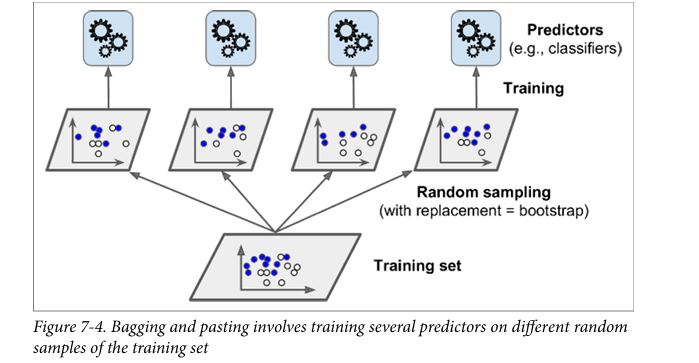

 Once all predictors are trained, the ensemble can make a prediction for a new
 instance by simply aggregating the predictions of all predictors. The aggregation
 function is typically the statistical mode (i.e., the most frequent prediction, just like a
 hard voting classifier) for classification, or the average for regression. Each individual
 predictor has a higher bias than if it were trained on the original training set, but
 aggregation reduces both bias and variance.4 Generally, the net result is that the
 ensemble has a similar bias but a lower variance than a single predictor trained on the
 original training set

In [3]:
# Lets code in sklearn
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# we already had data
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,n_jobs=-1,
    max_samples=100,bootstrap=True
)
bag_clf.fit(x_train,y_train)
y_pred=bag_clf.predict(x_test)
print('Accuracy Score',accuracy_score(y_pred,y_test))

Accuracy Score 1.0


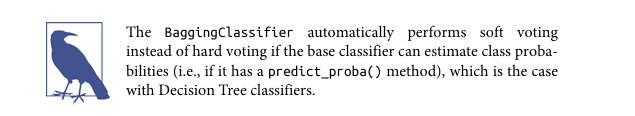

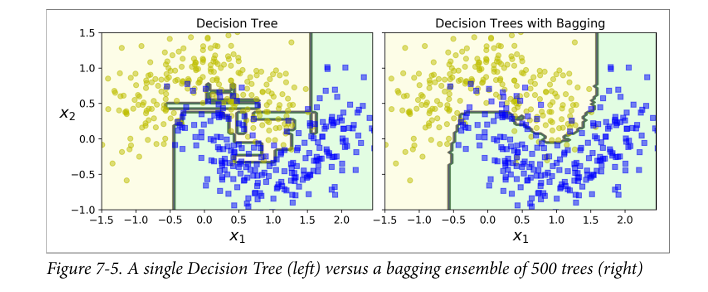

 Figure 7-5 compares the decision boundary of a single Decision Tree with the deci
sion boundary of a bagging ensemble of 500 trees (from the preceding code), both
 trained on the moons dataset. As you can see, the ensemble’s predictions will likely
 generalize much better than the single Decision Tree’s predictions: the ensemble has a
 comparable bias but a smaller variance (it makes roughly the same number of errors
 on the training set, but the decision boundary is less irregular)

 Bootstrapping introduces a bit more diversity in the subsets that each predictor is
 trained on, so bagging ends up with a slightly higher bias than pasting; but the extra
 diversity also means that the predictors end up being less correlated, so the ensemble’s
 variance is reduced. Overall, bagging often results in better models, which explains
 why it is generally preferred. However, if you have spare time and CPU power, you
 can use cross-validation to evaluate both bagging and pasting and select the one that
 works best.

##### Bagging is usually better overall:
##### -> Even though each individual model might be slightly less accurate (higher bias).
##### -> The reduced correlation between models lowers the overall variance, making the ensemble stronger and more robust.

# 3. Out-of-Bag Evalution
 With bagging, some instances may be sampled several times for any given predictor,
 while others may not be sampled at all. By default a BaggingClassifier samples m
 training instances with replacement (bootstrap=True), where m is the size of the
 training set. This means that only about 63% of the training instances are sampled on
 average for each predictor.6 The remaining 37% of the training instances that are not
 sampled are called out-of-bag (oob) instances. Note that they are not the same 37%
 for all predictors.
 Since a predictor never sees the oob instances during training, it can be evaluated on
 these instances, without the need for a separate validation set. You can evaluate the
 ensemble itself by averaging out the oob evaluations of each predictor.
 In Scikit-Learn, you can set oob_score=True when creating a BaggingClassifier to
 request an automatic oob evaluation after training. The following code demonstrates
 this. The resulting evaluation score is available through the oob_score_ variable:

In [4]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,
                         max_samples=100,n_jobs=-1,bootstrap=True,
                         oob_score=True)
bag_clf.fit(x_train,y_train)
y_pred=bag_clf.predict(x_test)
print('Out of Bag Evalution ',bag_clf.oob_score_)
print('Accuracy Score',accuracy_score(y_test,y_pred))

Out of Bag Evalution  0.9464285714285714
Accuracy Score 1.0


According to this the bagging had achieve 95% accuracy which is close to accuracy score.

The oob decision function for each training instance is also available through the
oob_decision_function_ variable. In this case (since the base estimator has a pre
dict_proba() method), the decision function returns the class probabilities for each
training instance. For example, the oob evaluation estimates that the first training
instance has a 68.25% probability of belonging to the positive class (and 31.75% of
belonging to the negative class):


In [5]:
print('oob Decsion Function\n',bag_clf.oob_decision_function_)

oob Decsion Function
 [[1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.03703704 0.96296296]
 [0.         0.9569378  0.0430622 ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.65533981 0.34466019]
 [0.         0.00507614 0.99492386]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.88359788 0.11640212]
 [0.         0.12560386 0.87439614]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [1.  

# 4. Random Patches and Random Subspaces

The BaggingClassifier class supports sampling the features as well. Sampling is
controlled by two hyperparameters: max_features and bootstrap_features. They
work the same way as max_samples and bootstrap, but for feature sampling instead
of instance sampling. Thus, each predictor will be trained on a random subset of the
input features

This technique is particularly useful when you are dealing with high-dimensional
inputs (such as images). Sampling both training instances and features is called the
Random Patches method

Keeping all training instances (by setting bootstrap=False and max_samples=1.0) but sampling features (by setting bootstrap_features to
True and/or max_features to a value smaller than 1.0) is called the Random Subspaces method

# 5. Random Forest

As we have discussed, a Random Forest9
 is an ensemble of Decision Trees, generally
trained via the bagging method (or sometimes pasting), typically with max_samples
set to the size of the training set. Instead of building a BaggingClassifier and pass‐
ing it a DecisionTreeClassifier, you can instead use the RandomForestClassifier
class, which is more convenient and optimized for Decision Trees10 (similarly, there is
a RandomForestRegressor class for regression tasks). The following code uses all
available CPU cores to train a Random Forest classifier with 500 trees (each limited
to maximum 16 nodes):



In [6]:
# lets code and check
from sklearn.ensemble import RandomForestClassifier
clf_tree=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
clf_tree.fit(x_train,y_train)
y_pred=clf_tree.predict(x_test)
print('accuracy score',accuracy_score(y_pred,y_test))

accuracy score 1.0


With a few exceptions, a RandomForestClassifier has all the hyperparameters of a
DecisionTreeClassifier (to control how trees are grown), plus all the hyperparameters of a BaggingClassifier to control the ensemble itself.11
The Random Forest algorithm introduces extra randomness when growing trees;
instead of searching for the very best feature when splitting a node , it
searches for the best feature among a random subset of features. The algorithm
results in greater tree diversity, which (again) trades a higher bias for a lower variance, generally yielding an overall better model. The following BaggingClassifier
is roughly equivalent to the previous RandomForestClassifier:

In [7]:
# lets code the randomforest using bagging and decision tree classifier
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(splitter='random',max_leaf_nodes=16),
    n_estimators=500,n_jobs=-1,max_samples=1.0,bootstrap=True
)
bag_clf.fit(x_train,y_train)

,estimator,DecisionTreeC...tter='random')
,n_estimators,500
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,None
,verbose,0


# 6. Extra Trees

When you are growing a tree in a Random Forest, at each node only a random subset
of the features is considered for splitting (as discussed earlier). It is possible to make
trees even more random by also using random thresholds for each feature rather than
searching for the best possible thresholds (like regular Decision Trees do).
A forest of such extremely random trees is called an Extremely Randomized Trees
ensemble12 (or Extra-Trees for short). Once again, this technique trades more bias for
a lower variance. It also makes Extra-Trees much faster to train than regular Random
Forests, because finding the best possible threshold for each feature at every node is
one of the most time-consuming tasks of growing a tree.
You can create an Extra-Trees classifier using Scikit-Learn’s ExtraTreesClassifier
class. Its API is identical to the RandomForestClassifier class. Similarly, the Extra
TreesRegressor class has the same API as the RandomForestRegressor class.

# 7. Feature Importance

Yet another great quality of Random Forests is that they make it easy to measure the
relative importance of each feature. Scikit-Learn measures a feature’s importance by
looking at how much the tree nodes that use that feature reduce impurity on average
(across all trees in the forest). More precisely, it is a weighted average, where each
node’s weight is equal to the number of training samples that are associated with it

Scikit-Learn computes this score automatically for each feature after training, then it
scales the results so that the sum of all importances is equal to 1. You can access the
result using the feature_importances_ variable. For example, the following code
trains a RandomForestClassifier on the iris dataset (introduced in Chapter 4) and
outputs each feature’s importance. It seems that the most important features are the
petal length (43%) and width (45%), while sepal length and width are rather unim‐
portant in comparison (10% and 2%, respectively):


In [8]:
# lets code and check
clf_tree=RandomForestClassifier(n_estimators=500,n_jobs=-1)
iris=load_iris()
clf_tree.fit(iris['data'],iris['target'])
for name,score in zip(iris['feature_names'],clf_tree.feature_importances_):
    print(name,score)

sepal length (cm) 0.09149907055840685
sepal width (cm) 0.02282221582282195
petal length (cm) 0.45725680043725353
petal width (cm) 0.4284219131815176


# 8. Ada Boost

#### It is the technique similar to random forest but in it same as random forest multiple trees are created but with only one node and two leaf called as stumps hence ada boost is also called as "Stumps Forests".

#### Main ideas of ada boost:
##### 1. create multiple stumps forest as weak learner 
##### 2. classify the weak learner on the amount of say
##### 3. depending upon the order of say the are classified


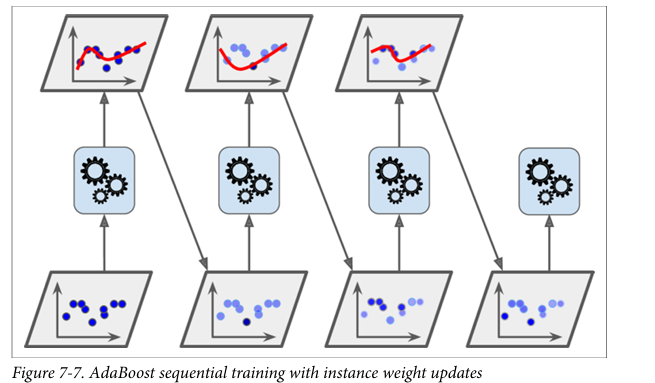

#### How does the forest of stumps are created 
1. get the dataset
2. give the sample weight to the each row
3. initially the sample weight is equal i.e weight=1/total number of sample
4. create and individual tree to predict the outcome for all column
5. classify the correct and incorrect predicted values for each tree
6. calculate the gini index value for each tree
7. select the lowest gini index value tree as base
8. make the classification and find the total error which is sum of total miss classified values sample weight
9. calculate the amount of say which is (1/2)x(log(1-total_error)/total_error)
10. modify the weight
11. miss classified sample weight=total_error x e^(amount of say ) -> we increase the weight of missclassified values
12. correctly classifed sample weight = total_error x e^(- amount of say) -> we decrease the weight of correctly classified sample\
13. take the new weight then normailize it so that all of its sum is one
14. take new sample and create and bootstrap new dataset of same size but it contain duplicate of miss classified sample
15. and then again create same stump of tree

In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [10]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
x=df.drop('target',axis=1)
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
# base estimator
base_estimator=DecisionTreeClassifier(max_depth=1) # depth=1 for decision stump

parameter of ada boost
1. n_estimator= maximum of number of weak learner at which boosting is terminated
2. learning_rate= shrink the contribution of each learner
3. algorithm : 'SAMME'-> for multiclass classification
                'SAMME.R'-> for real valued output generally better

In [13]:
adaboost_model=AdaBoostClassifier(estimator=base_estimator,n_estimators=100,learning_rate=1.0,random_state=42)

In [14]:
print('Traning Adaboost classifier....')
adaboost_model.fit(x_train,y_train)
print('Training complete....')

Traning Adaboost classifier....
Training complete....


In [15]:
y_pred=adaboost_model.predict(x_test)

In [16]:
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [17]:
print(f'\nModel Accuracy Score {accuracy:.4f}')
print(f'\nClassification report \n{report}')
print('\nWeights of individual estimator (alpha values)')
print(adaboost_model.estimator_weights_)
print('\nErrors of individual estimator:')
print(adaboost_model.estimator_errors_)


Model Accuracy Score 0.8352

Classification report 
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91


Weights of individual estimator (alpha values)
[1.1239301  1.13353339 0.98954202 0.89313521 0.30690229 0.37496338
 0.60379968 0.60219942 0.26470627 0.50122133 0.38735909 0.26783725
 0.48173802 0.3672614  0.35462826 0.13274409 0.15473706 0.28882401
 0.22777644 0.26190672 0.4069932  0.25082361 0.41040629 0.3154188
 0.08656853 0.12600207 0.2892606  0.2415258  0.19907918 0.23750888
 0.1682684  0.13343382 0.12123745 0.08942449 0.20584138 0.20934386
 0.09492287 0.08168399 0.17061204 0.15250831 0.173398   0.1181337
 0.27349901 0.30942731 0.05924634 0.0725032  0.06986607 0.06479544
 0.06276142 0.06754762 0.24409707 0.26

# Gradient Boosting

Another very popular boosting algorithm is Gradient Boosting.
17 Just like AdaBoost,
Gradient Boosting works by sequentially adding predictors to an ensemble, each one
correcting its predecessor. However, instead of tweaking the instance weights at every
iteration like AdaBoost does, this method tries to fit the new predictor to the residual
errors made by the previous predictor.

Let’s go through a simple regression example, using Decision Trees as the base predic‐
tors (of course, Gradient Boosting also works great with regression tasks). This is
called Gradient Tree Boosting, or Gradient Boosted Regression Trees (GBRT). First, let’s
fit a DecisionTreeRegressor to the training set (for example, a noisy quadratic train‐
ing set):

##### So we are doing fist with the help of decision tree regressor algorithm
###### as we know that the residual or mistake made by first is overcomed by other tree so similar we are doing

In [18]:
# Importing library
from sklearn.tree import DecisionTreeRegressor

In [19]:
# first base tree

reg_tree1=DecisionTreeRegressor(max_depth=2)
reg_tree1.fit(x,y)
y2=y - reg_tree1.predict(x)

In [20]:
# Second tree
reg_tree2=DecisionTreeRegressor(max_depth=2)
reg_tree2.fit(x,y2)
y3=y2-reg_tree2.predict(x) # residual

In [21]:
# Third tree
reg_tree3=DecisionTreeRegressor(max_depth=2)
reg_tree3.fit(x,y3)
y4=y3-reg_tree3.predict(x) # residual

In [22]:
# calculating the total prediction on new sample 
y_pred=sum([tree.predict(x) for tree in (reg_tree1,reg_tree2,reg_tree3)])

A simpler way to train GBRT ensembles is to use Scikit-Learn’s GradientBoostingRe
gressor class. Much like the RandomForestRegressor class, it has hyperparameters to
control the growth of Decision Trees (e.g., max_depth, min_samples_leaf), as well as
hyperparameters to control the ensemble training, such as the number of trees
(n_estimators). The following code creates the same ensemble as the previous one:


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
gbrt=GradientBoostingRegressor(n_estimators=3,max_depth=2,learning_rate=1.0)
gbrt.fit(x,y)
# similar stuff what wec created above

,loss,'squared_error'
,learning_rate,1.0
,n_estimators,3
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


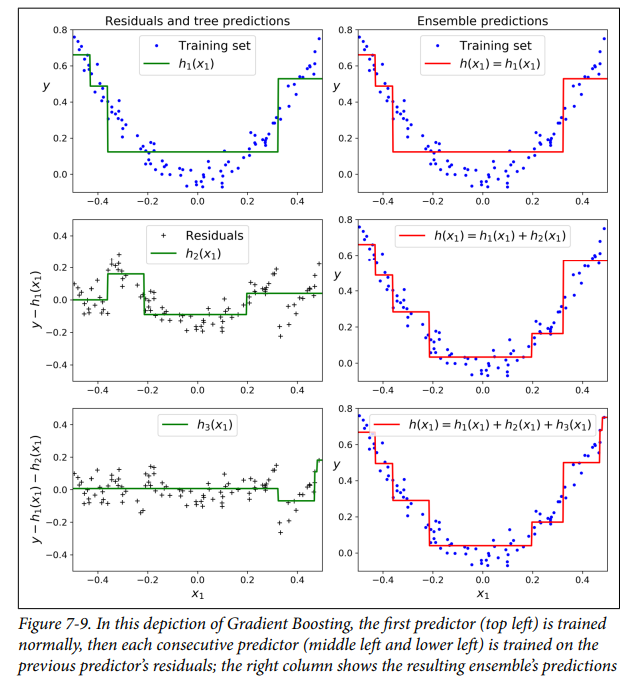

The learning_rate hyperparameter scales the contribution of each tree. If you set it
to a low value, such as 0.1, you will need more trees in the ensemble to fit the train‐
ing set, but the predictions will usually generalize better. This is a regularization tech‐
nique called shrinkage. Figure 7-10 shows two GBRT ensembles trained with a low
learning rate: the one on the left does not have enough trees to fit the training set,
while the one on the right has too many trees and overfits the training set.


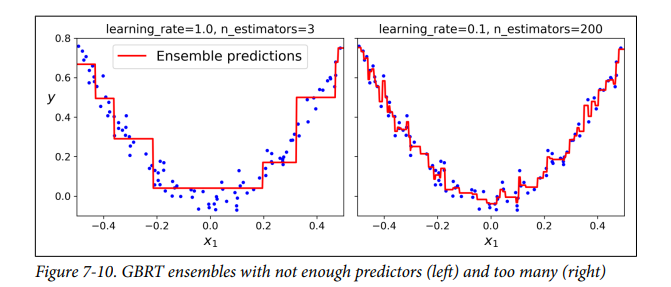

In order to find the optimal number of trees, you can use early stopping (see Chap‐
ter 4). A simple way to implement this is to use the staged_predict() method: it
returns an iterator over the predictions made by the ensemble at each stage of train‐
ing (with one tree, two trees, etc.). The following code trains a GBRT ensemble with
120 trees, then measures the validation error at each stage of training to find the opti‐
mal number of trees, and finally trains another GBRT ensemble using the optimal
number of trees:

In [25]:
# importing library
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

In [26]:
# Loding data 
x, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)

In [27]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
gbrt=GradientBoostingRegressor(n_estimators=120,learning_rate=0.1,max_depth=2)
gbrt.fit(x_train,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,120
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


In [29]:
errors=[mean_squared_error(y_val,y_pred) for y_pred in gbrt.staged_predict(x_val)]
print(errors)

[15840.232810667823, 14789.525508670236, 13829.639184303887, 13035.084750449145, 12270.687490674281, 11581.195437136657, 10925.633622029232, 10405.429784544367, 10003.812733748358, 9518.12579900363, 9154.385608495018, 8727.136834221415, 8393.079982316105, 8055.297065034352, 7796.402990405027, 7493.189988303011, 7241.7256785858635, 7072.876485328422, 6869.323292895192, 6621.575175516572, 6425.1763561334465, 6271.122493997187, 6056.169831659546, 5903.825589747759, 5742.72206654457, 5611.420977798768, 5445.638870434208, 5305.344404743507, 5201.735105963876, 5089.688868175732, 4925.777712956084, 4834.48672235865, 4717.426902258336, 4642.674982864685, 4496.199403309374, 4404.477862531721, 4317.023157955134, 4198.688130031004, 4104.824552477704, 4015.8946391746435, 3947.2533977587927, 3881.020550165652, 3797.462093770722, 3737.9541551564203, 3657.0813621269167, 3586.937428333801, 3490.7324832379727, 3436.6440991824875, 3375.3920620804092, 3326.4048831831183, 3257.3239850283235, 3199.68889249

In [30]:
best_estimator=np.argmin(errors)+1
print(best_estimator)

120


In [31]:
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=120,learning_rate=0.01)
gbrt_best.fit(x_train, y_train)

,loss,'squared_error'
,learning_rate,0.01
,n_estimators,120
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


It is also possible to implement early stopping by actually stopping training early
(instead of training a large number of trees first and then looking back to find the
optimal number). You can do so by setting warm_start=True, which makes ScikitLearn keep existing trees when the fit() method is called, allowing incremental
training. The following code stops training when the validation error does not
improve for five iterations in a row:

In [32]:
gbrt=GradientBoostingRegressor(max_depth=2,warm_start=True)

In [33]:
min_value_error=float('inf')
error_going_up=0
for n_estimator in range(1,120):
    gbrt.n_estimators=n_estimator
    gbrt.fit(x_train,y_train)
    y_pred=gbrt.predict(x_val)
    error=mean_squared_error(y_val,y_pred)
    if(error<min_value_error):
        min_value_error=error
        error_going_up=0
    else:
        error_going_up+=1
        if(error_going_up==5):
            print(n_estimator)
            break #Early stopping

In [34]:
# for just check
print(error_going_up)
print(gbrt.n_estimators_)

0
119


The GradientBoostingRegressor class also supports a subsample hyperparameter,
which specifies the fraction of training instances to be used for training each tree. For
example, if subsample=0.25, then each tree is trained on 25% of the training instan‐
ces, selected randomly. As you can probably guess by now, this technique trades a
higher bias for a lower variance. It also speeds up training considerably. This is called
Stochastic Gradient Boosting.


#### Gradient Boosting For Classification

In [35]:
from sklearn.datasets import load_iris

In [36]:
data=load_iris()
print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [37]:
import pandas as  pd
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df['target']=data.target

In [38]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
df.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

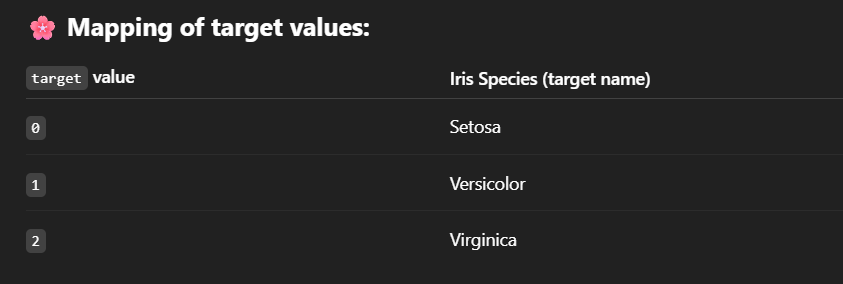

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [41]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [42]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='target', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='target', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='

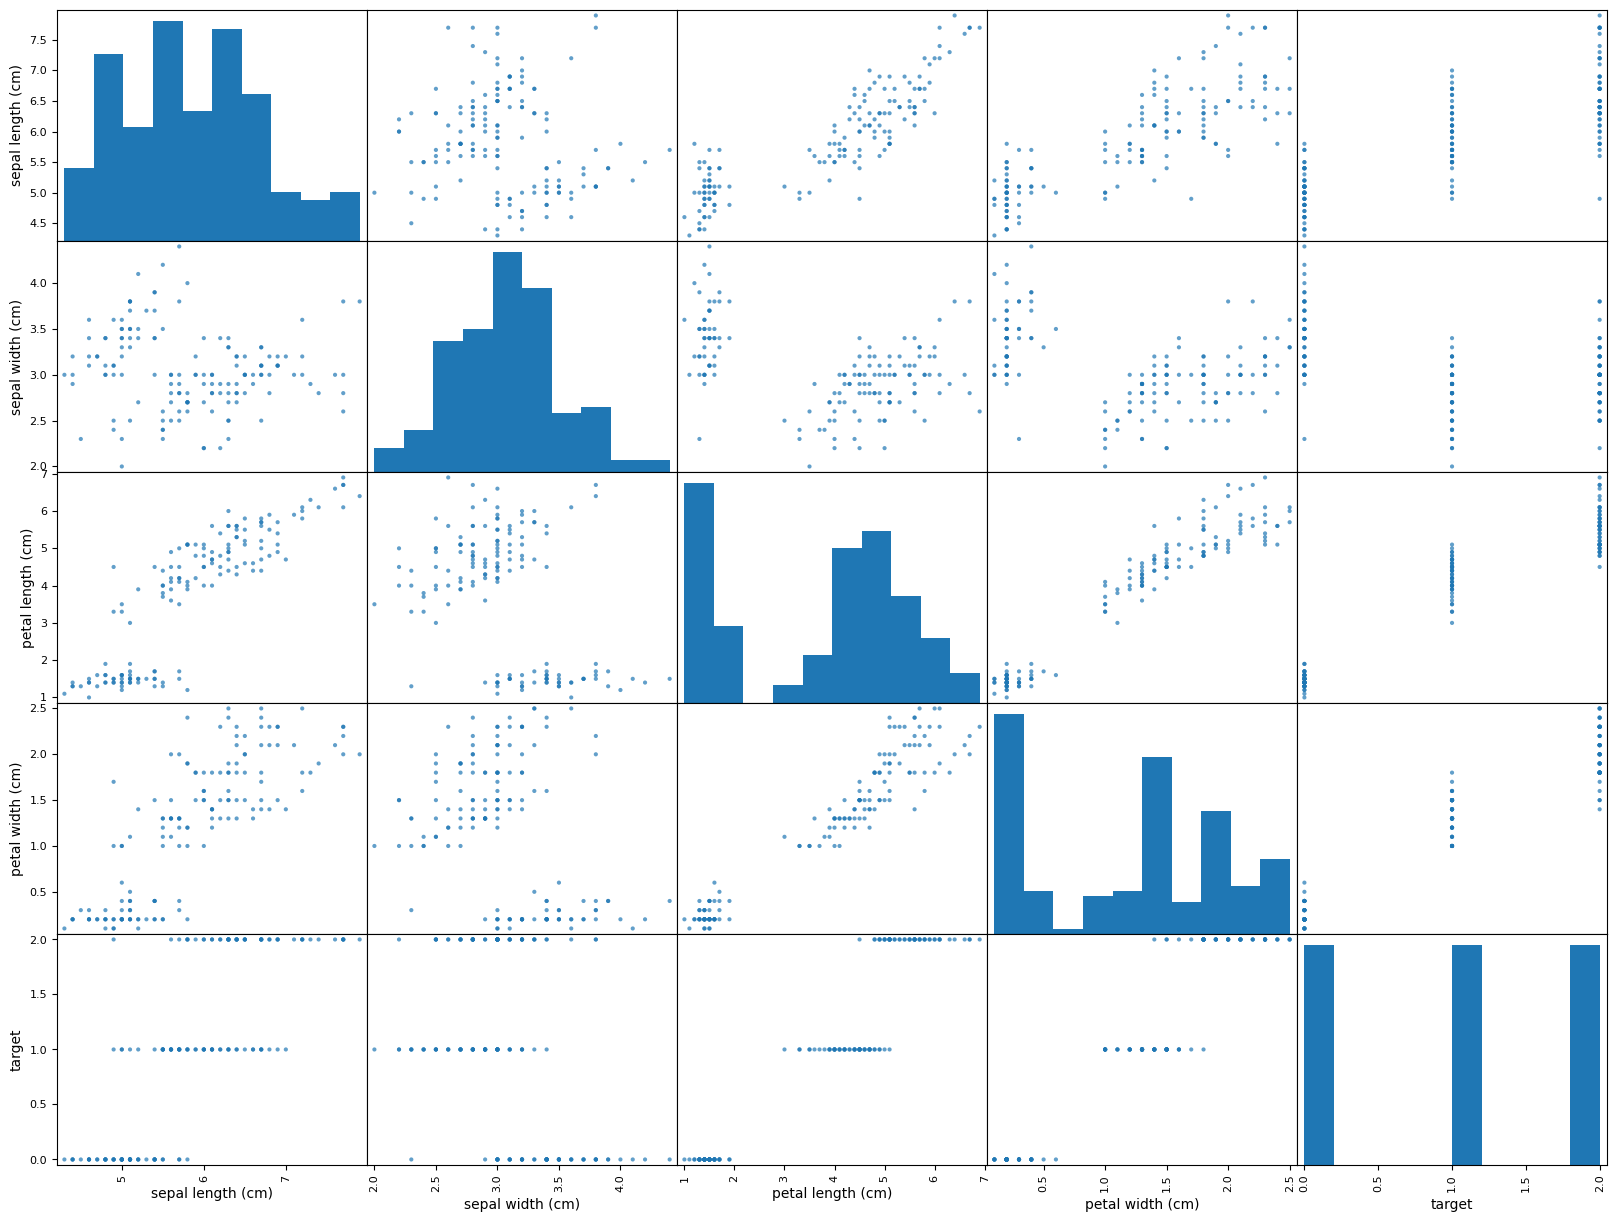

In [43]:
scatter_matrix(df,alpha=0.7,figsize=(20,15))

In [44]:
df_corr=df.corr()
df_corr['target'].sort_values(ascending=False)

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: target, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('target',axis=1),df['target'],test_size=0.2,random_state=42)

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
gbclf=GradientBoostingClassifier(n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    validation_fraction=0.1,
    n_iter_no_change=10,
    random_state=42)

In [49]:
gbclf.fit(x_train,y_train)

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,1000
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gbclf, df.drop('target',axis=1), df['target'], cv=5)
print("Cross-val Accuracy:", scores.mean())

Cross-val Accuracy: 0.9600000000000002


In [51]:
for lr in [0.01, 0.05, 0.1, 0.2]:
    model = GradientBoostingClassifier(learning_rate=lr, n_estimators=100, max_depth=3, random_state=42)
    scores = cross_val_score(model, df.drop('target',axis=1) , df['target'], cv=5)
    print(f"Learning Rate: {lr}, Cross-Val Accuracy: {scores.mean():.4f}")


Learning Rate: 0.01, Cross-Val Accuracy: 0.9600
Learning Rate: 0.05, Cross-Val Accuracy: 0.9600
Learning Rate: 0.1, Cross-Val Accuracy: 0.9600
Learning Rate: 0.2, Cross-Val Accuracy: 0.9600


In [52]:
y_pred_train=gbclf.predict(x_train)
mean_squared_error(y_train,y_pred_train)

0.0

In [53]:
y_pred=gbclf.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score,mean_squared_error
errors=mean_squared_error(y_test,y_pred)
print(errors)

0.0


# XGBoost

###### Inshort extreme Gradient Boost

####  This package was initially developed by Tianqi Chen as part of the Distributed (Deep) Machine Learning Community (DMLC), and it aims to be extremely fast, scalable, and portable. In fact, XGBoost is often an important component of the winning entries in ML competitions. XGBoost’s API is quite similar to Scikit-Learn’s

### 1. XGBoost Regressor

In [55]:
import xgboost as xgb

In [56]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error

In [57]:
housing=fetch_california_housing()
import pandas as  pd
df=pd.DataFrame(data=housing.data,columns=housing.feature_names)
df['target']=housing.target

In [58]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [59]:
# checking null values
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [61]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [62]:
#checking correlation
df_corr=df.corr()
df_corr['target'].sort_values(ascending=False)

target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64

In [63]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('target',axis=1),df['target'],test_size=0.2,random_state=42)

In [64]:
xgboost_reg=xgb.XGBRegressor(n_estimators=40,
                            learning_rate=0.3,
                             gamma=130,
                        )

In [65]:
xgboost_reg.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [66]:
y_pred=xgboost_reg.predict(x_test)

In [67]:
mean_squared_error(y_pred,y_test)

0.4094317216094184

In [68]:
mean_squared_error(y_train,xgboost_reg.predict(x_train))

0.3858082682047179

In [69]:
# For Early fitting
xgboost_reg=xgb.XGBRegressor(n_estimators=40,
                            learning_rate=0.3,
                             gamma=130, early_stopping_rounds=2
                        )
xgboost_reg.fit(x_train, y_train,
            eval_set=[(x_test, y_test)])
y_pred = xgboost_reg.predict(x_test)

[0]	validation_0-rmse:0.96378
[1]	validation_0-rmse:0.83777
[2]	validation_0-rmse:0.76813
[3]	validation_0-rmse:0.73583
[4]	validation_0-rmse:0.70336
[5]	validation_0-rmse:0.68827
[6]	validation_0-rmse:0.67856
[7]	validation_0-rmse:0.63987
[8]	validation_0-rmse:0.63987
[9]	validation_0-rmse:0.63987


In [70]:
mean_squared_error(y_test,y_pred)

0.40943137990605594

## 2. XGBOOST Classifier

In [71]:
from sklearn.datasets import load_digits
import xgboost as xgb

In [72]:
digits=load_digits()
df=pd.DataFrame(digits.data,columns=digits.feature_names)
df['Target']=digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [73]:
print(df.shape)

(1797, 65)


In [74]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Target',axis=1),df['Target'],test_size=0.2,random_state=42)

In [75]:
from sklearn.model_selection import GridSearchCV
model_xgbclf=xgb.XGBClassifier()
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 5]
}
gridcv=GridSearchCV(model_xgbclf,param_grid=param_grid,n_jobs=-1,scoring='accuracy',cv=5)
gridcv.fit(x_train,y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.1, 0.3], 'max_depth': [3, 5], 'n_estimators': [50, 100]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'multi:softprob'


In [76]:
print("Best Estimator",gridcv.best_estimator_)
print("Best Parameter",gridcv.best_params_)
print("Scroe",gridcv.best_score_)

Best Estimator XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)
Best Parameter {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100}
Scroe 0.9596254355400697


In [77]:
clf=xgb.XGBClassifier(n_estimators=100,learning_rate=0.3,max_depth=3)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Residual",mean_squared_error(y_pred,y_test))

Residual 0.15555555555555556


In [78]:
test_x=x_test.to_numpy()
test_x[1].shape

(64,)

In [79]:
clf.predict(test_x[1].reshape(1,64))

array([9])

In [80]:
test_y=y_test.to_numpy()
test_y[1]

np.int64(9)

###### Correctly classified

In [81]:
from xgboost import plot_tree
import matplotlib.pyplot as plt